In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

%matplotlib inline

In [2]:
#Reading the Spotify dataset

df_track=pd.read_csv("SpotifyFeatures.csv")
df_track.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
#Checking the dimension of the dataset

df_track.shape
#df_track.columns

(232725, 18)

In [4]:
#Checking Datatypes

df_track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [5]:
#Data Cleaning (Checking for Missing Values)

df_track.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [6]:
#Statistical Summary of our dataset

df_track.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


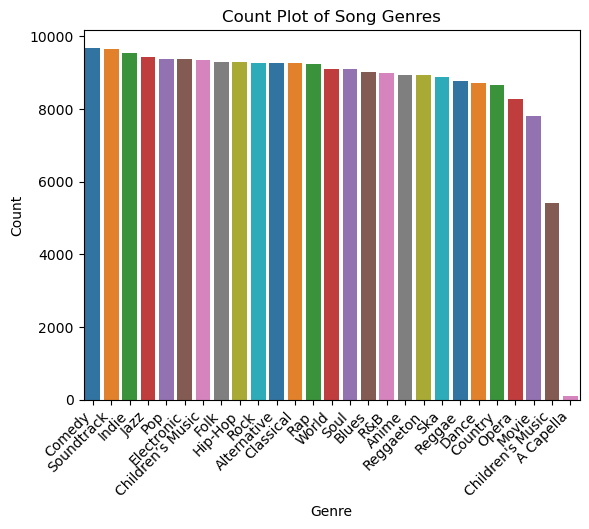

In [7]:
df_genre=df_track['genre'].value_counts().sort_values(ascending=False)

tableau_colors = sns.color_palette('tab10', 10)

sns.countplot(x="genre",data=df_track,order=df_genre.index,palette=tableau_colors)
plt.xticks(rotation=45, ha='right')

plt.title("Count Plot of Song Genres")
plt.xlabel("Genre")
plt.ylabel("Count")

plt.tight_layout
plt.show()

In [8]:
#Data Analysis

#Top 10 most popular artists
top_10_artists=df_track.groupby("artist_name").count().sort_values(by="track_name",ascending=False)["track_name"][:10]
top_10_artists

artist_name
Giuseppe Verdi             1394
Giacomo Puccini            1137
Kimbo Children's Music      971
Nobuo Uematsu               825
Richard Wagner              804
Wolfgang Amadeus Mozart     800
Randy Newman                757
Georges Bizet               701
Juice Music                 684
Johann Sebastian Bach       632
Name: track_name, dtype: int64

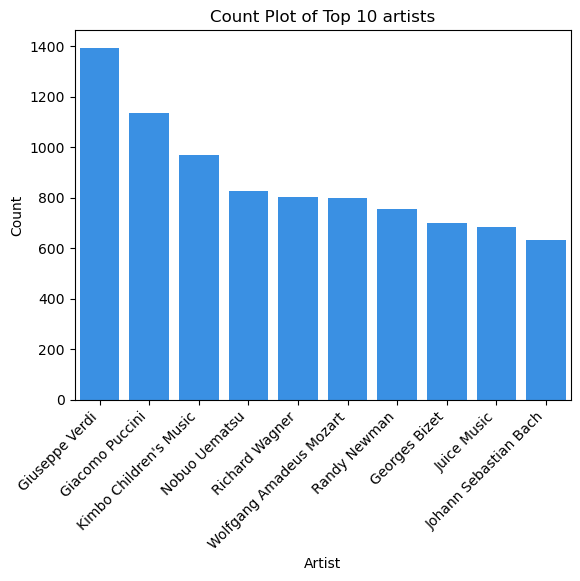

In [9]:
#Visualizing the 10 most popular artists


sns.countplot(x="artist_name",data=df_track,order=top_10_artists.index,color="dodgerblue")
plt.xticks(rotation=45, ha='right')

plt.title("Count Plot of Top 10 artists")
plt.xlabel("Artist")
plt.ylabel("Count")

plt.tight_layout
plt.show()

In [10]:
#Artists with the most acoustic tracks

top_5_artists_acoustic_songs=df_track[["acousticness","track_name","artist_name"]].sort_values(by="acousticness",ascending=False)[:5]
top_5_artists_acoustic_songs

,acousticness,track_name,artist_name
217176,0.996,Sequent C - Remastered 1995,Tangerine Dream
167157,0.996,"3 Morceaux en forme de poire: No. 1, Manière d...",Erik Satie
124606,0.996,"Piano Sonata No. 14 In C Sharp Minor, Op. 27 N...",Ludwig van Beethoven
198485,0.996,"So Close, So Far",Dustin O'Halloran
75288,0.996,Victory Easter Carol,Children Songs Company


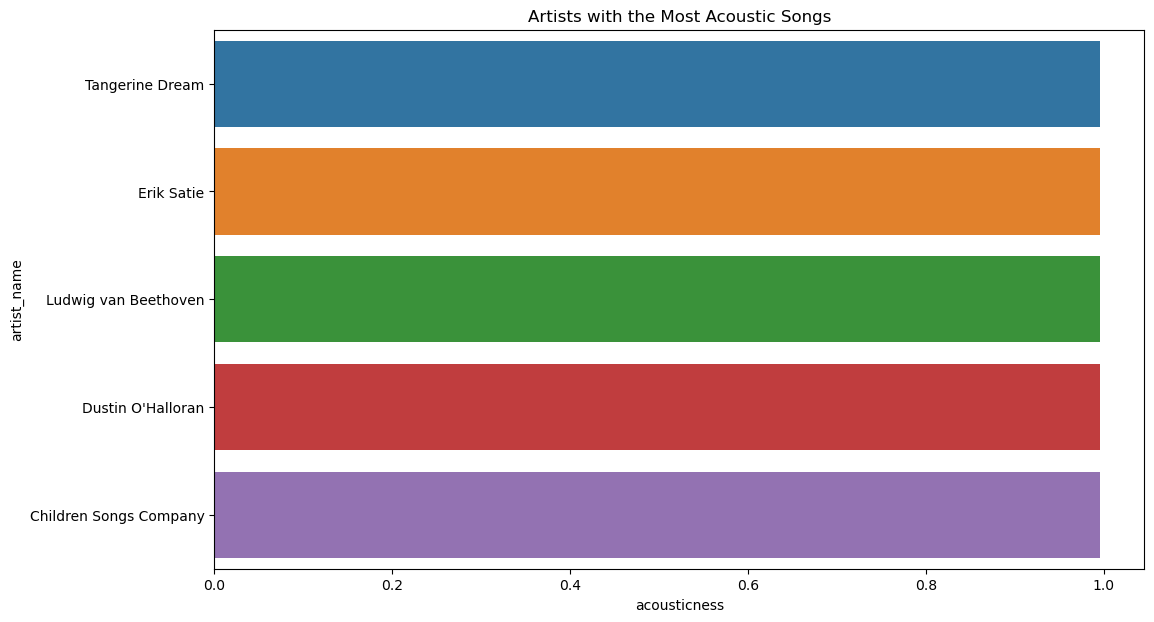

In [11]:
#Visualize the above information

plt.figure(figsize=(12,7))
sns.barplot(x="acousticness",y="artist_name",data=top_5_artists_acoustic_songs)
plt.title("Artists with the Most Acoustic Songs")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

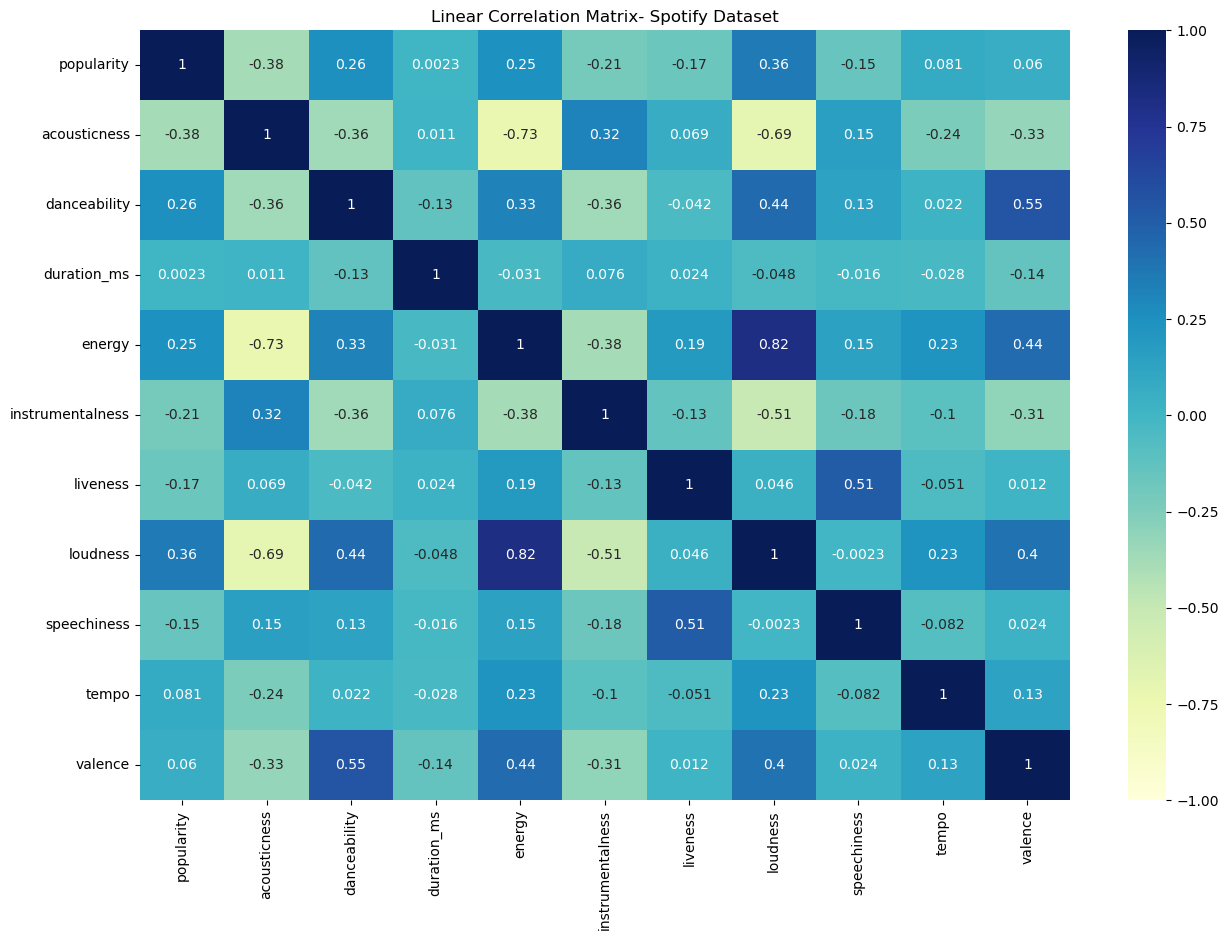

In [12]:
#Model Building

#Correlation heat-map

df_track_numeric=df_track.loc[:,['popularity','acousticness','danceability','duration_ms',
                'energy','instrumentalness','liveness','loudness','speechiness',
               'tempo','valence']]

fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_track_numeric.corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1,center=0,ax=ax)
plt.title('Linear Correlation Matrix- Spotify Dataset')

plt.show

In [32]:
df_track['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [33]:
df_track['genre'].nunique()

27

In [3]:
#Here, we can see that A Capella has significantly lower song count as compared to the rest. So, we can remove that.

df_track_new=df_track.copy()
df_track_new= df_track_new[df_track_new['genre']!='A Capella']

In [11]:
df_track_new.shape

(232606, 18)

In [4]:
#Model Building 
y=df_track_new["genre"]
X=df_track_new[["popularity","acousticness","danceability","duration_ms",
              "energy","instrumentalness","liveness","loudness",
              "speechiness","tempo","valence"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
#Train and Evaludate Decision Tree and Random Forest Classifiers

def train_decision_tree(X_train, y_train, max_depth=None):
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_classifier.fit(X_train, y_train)
    return dt_classifier

def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_classifier.fit(X_train, y_train)
    return rf_classifier

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    return accuracy, precision, recall, f1, roc_auc

In [9]:
#Perform Hyperparamter tuning using Randomized Search CV

from scipy.stats import randint

# Decision Tree Hyperparameter Tuning
dt_param_dist = {
    'max_depth': randint(1, 10),  # Random integer values from 1 to 29
}

dt_classifier = DecisionTreeClassifier(random_state=42)
random_search_dt = RandomizedSearchCV(dt_classifier, param_distributions=dt_param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_dt.fit(X_train, y_train)
best_dt_params = random_search_dt.best_params_

# Random Forest Hyperparameter Tuning
rf_param_dist = {
    'n_estimators': randint(50, 80),  # Random integer values from 50 to 199
    'max_depth': randint(1, 10),       # Random integer values from 1 to 19
}

rf_classifier = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=rf_param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf_params = random_search_rf.best_params_

In [10]:
best_dt_classifier = train_decision_tree(X_train, y_train, max_depth=best_dt_params['max_depth'])
best_rf_classifier = train_random_forest(X_train, y_train, n_estimators=best_rf_params['n_estimators'], max_depth=best_rf_params['max_depth'])

In [11]:
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc_auc = evaluate_model(best_dt_classifier, X_test, y_test)
rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc = evaluate_model(best_rf_classifier, X_test, y_test)

print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("ROC AUC:", dt_roc_auc)

print("\nRandom Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("ROC AUC:", rf_roc_auc)

C:\Users\Saptarshi Chowdhury\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Classifier:
Accuracy: 0.3416663084132239
Precision: 0.3537716445984205
Recall: 0.3416663084132239
F1 Score: 0.3293524989518434
ROC AUC: 0.8780652668980028

Random Forest Classifier:
Accuracy: 0.40916125703968015
Precision: 0.40533540496777565
Recall: 0.40916125703968015
F1 Score: 0.3963728573100381
ROC AUC: 0.9150410135907323


0.8207751219404533
0.29593846731075885


0.24213488415720852


Error in callback <function flush_figures at 0x000001553315E280> (for post_execute):



KeyboardInterrupt

